<a href="https://colab.research.google.com/github/Axel3D2Y/LSMT/blob/main/Prueba%20de%20LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import kagglehub
import random


# Download latest version
path = kagglehub.dataset_download("henryshan/meta-platforms-inc-meta")

print("Path to dataset files:", path)

def fijar_semillas():
    set_seed(123)
    np.random.seed(123)
    random.seed(123)


Path to dataset files: /kaggle/input/meta-platforms-inc-meta


In [35]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Dense, LSTM, Input
from tensorflow.random import set_seed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [36]:
data = pd.read_csv(path+ "/META.csv")

In [37]:
data['Date'] = pd.to_datetime(data['Date'])
data= data.sort_values(by='Date')
fechas = data['Date']

In [48]:
scaler = StandardScaler()

In [52]:
data_scaled = scaler.fit_transform(data.drop('Date', axis=1))

In [39]:
open= data_scaled[:,1]

In [40]:
X=[]
y=[]
ventana= 60

In [41]:
for i in range(ventana, len(open)):
  X.append(open[i-ventana:i])
  y.append(open[i])

In [42]:
X_train, X_test = train_test_split(X, test_size=0.2, shuffle=False)
y_train, y_test = train_test_split(y, test_size=0.2, shuffle=False)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [43]:
fijar_semillas()

In [44]:
from tensorflow.keras.models import Sequential

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(ventana, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [46]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

model.fit(X_train,y_train, batch_size=32, epochs=30, validation_split=0.1, verbose=True)

Epoch 1/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - loss: 0.1325 - val_loss: 0.1234
Epoch 2/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0055 - val_loss: 0.0651
Epoch 3/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.0042 - val_loss: 0.0602
Epoch 4/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0039 - val_loss: 0.0520
Epoch 5/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0036 - val_loss: 0.0462
Epoch 6/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.0034 - val_loss: 0.0404
Epoch 7/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0032 - val_loss: 0.0350
Epoch 8/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0031 - val_loss: 0.0308
Epoch 9/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0029 - val_loss: 0.0277
Epoch 10/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0027 - val_loss: 0.0256
Epoch 11/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0026 - val_loss: 0.0241
Epoch 12/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0

In [49]:
predict = model.predict(X_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [56]:
# Find the index of the 'Open' column in the data after dropping 'Date'
open_col_index = data.drop('Date', axis=1).columns.get_loc('Open')
print(f"Index of 'Open' column: {open_col_index}")

Index of 'Open' column: 0


In [57]:
# Apply inverse transform using the mean and scale for the 'Open' column
predictions = predict * scaler.scale_[open_col_index] + scaler.mean_[open_col_index]
real_prices = y_test * scaler.scale_[open_col_index] + scaler.mean_[open_col_index]

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(predict, real_prices))
mae = mean_absolute_error(predict, real_prices)
print(rmse)
print(mae)

247.297039429243
234.92104250542573


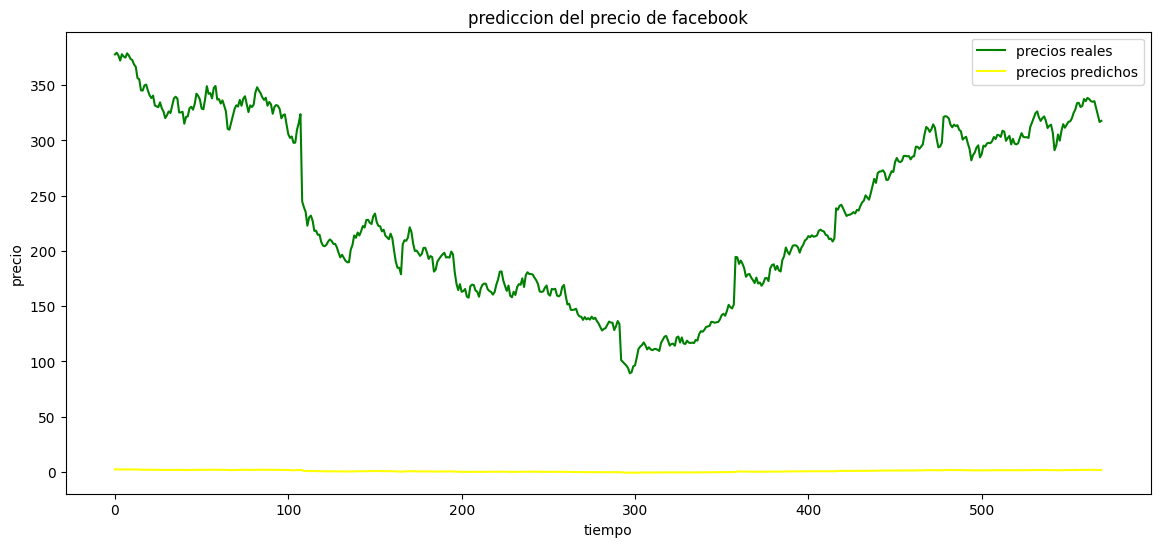

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(real_prices, color='green',label='precios reales')
plt.plot(predict, color='yellow',label='precios predichos')
plt.title('prediccion del precio de facebook')
plt.xlabel('tiempo')
plt.ylabel('precio')
plt.legend()
plt.show()
